# NLP learning step by step with me for preparing interview

- Stemming and Lemmatization
- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF Term Frequency - Inverse Document Frequency
- Word2Vec
- Text Classification explor with Spam classification:
- Creating the Bag of Word model-Naive baes classifier-evaluation
- Creating the TF-IDF word model-Random Forest-evaluation
- Creating Word2vec model-SVM-Evaluation

### Stemming:
- **Definition**: Stemming is a crude heuristic process that chops off the ends of words in an attempt to reduce them to their base or root form. The goal is to remove derivational affixes to get the word stem.
- **Example**:
  - The word `"running"` might be stemmed to `"run"`.
  - The word `"happiness"` might be stemmed to `"happi"`.
- **Techniques**: Algorithms like the Porter Stemmer, Snowball Stemmer, or Lancaster Stemmer are commonly used.
- **Output**: Stemming can produce non-real words since it does not consider the meaning of the word, just the structure. For example, `"studies"` might be stemmed to `"studi"`, which is not a real word.
- **Use Case**: Stemming is faster and less complex, often used in applications where precision is less critical, such as search engines.

### Lemmatization:
- **Definition**: Lemmatization is a more sophisticated process that reduces words to their base or dictionary form, called a lemma. It considers the context and the word’s part of speech (POS) to determine the correct form.
- **Example**:
  - The word `"running"` is lemmatized to `"run"`.
  - The word `"better"` is lemmatized to `"good"`.
- **Techniques**: Lemmatization often involves using a dictionary or a look-up table, and may also require the POS tagging of words.
- **Output**: Lemmatization produces real, dictionary-validated words, maintaining more accurate and meaningful results compared to stemming.
- **Use Case**: Lemmatization is more precise and is used in applications where understanding the meaning of words is important, such as text analysis or natural language processing tasks.

### Summary:
- **Stemming** is a faster, more simplistic approach that might not always produce real words, but it's useful when speed is essential, and precision is less important.
- **Lemmatization** is a more accurate approach that results in meaningful, dictionary-based words, but it is more complex and computationally expensive.

For many NLP tasks where understanding and context are important, **lemmatization** is often preferred over **stemming**.


# Stemming

In [11]:
import nltk
from nltk.stem import PorterStemmer  
from nltk.corpus import stopwords

# Initialize the PorterStemmer
stemmer = PorterStemmer() 

# Example paragraph (you can replace this with your own text)
paragraph = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. It involves the ability to analyze, understand, and generate human language. Techniques such as tokenization, stemming, and removing stopwords are commonly used to preprocess text data for machine learning models."


# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)
#print(sentences)

# Loop through each sentence in the paragraph
for i in range(len(sentences)):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentences[i])

    # Stem each word and remove stopwords
    words = [stemmer.stem(word) for word in words if word.lower() not in set(stopwords.words('english'))]  # Added .lower() to handle case sensitivity
    sentences[i]=" ".join(words)

#print(sentences)

# Lemmitazation

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer  # Import the WordNetLemmatizer
from nltk.corpus import stopwords

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()  

# Example paragraph (you can replace this with your own text)
paragraph = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. It involves the ability to analyze, understand, and generate human language. Techniques such as tokenization, stemming, and removing stopwords are commonly used to preprocess text data for machine learning models."

# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Loop through each sentence in the paragraph
for i in range(len(sentences)):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentences[i])

    # Lemmatize each word and remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in set(stopwords.words('english'))]  # Added .lower() to handle case sensitivity
    
    # Join the lemmatized words back into a sentence
    sentences[i] = " ".join(words)

# The sentences list now contains the lemmatized and cleaned sentences


# N-gram
- Unigram: `please | turn | your | page`
- Bigram: `please turn | turn your | your page`
- Trigram: `please turn your | turn your page`

You can think of an N-gram as the sequence of N words, by that notion, a 2-gram (or bigram) is a two-word sequence of words like “please turn”, “turn your”, or ”your page”, and a 3-gram (or trigram) is a three-word sequence of words like “please turn your”, or “turn your page”

# Bag of Word

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval. 

### Example:
Suppose you have the following three sentences in your dataset:

- "The cat sat on the mat."
- "The dog sat on the log."
- "The cat and the dog played together."

### Step 1: Preprocessing
- **Lowercasing**: Convert all text to lowercase.
- **Tokenization**: Split each sentence into words.
- **Removing Stopwords**: Remove common words like "the," "and," "on," etc.
- **Stemming/Lemmatization (Optional)**: Reduce words to their root form (e.g., "played" to "play").

Let's preprocess the sentences:

- "cat sat mat"
- "dog sat log"
- "cat dog played together"

### Step 2: Building the Vocabulary
We create a vocabulary (a set of unique words) from all the preprocessed sentences:

- **Vocabulary**: `["cat", "sat", "mat", "dog", "log", "played", "together"]`

### Step 3: Creating the Bag of Words
For each sentence, we count the occurrence of each word from the vocabulary:

|            | cat | sat | mat | dog | log | played | together |
|------------|-----|-----|-----|-----|-----|--------|----------|
| Sentence 1 |  1  |  1  |  1  |  0  |  0  |   0    |    0     |
| Sentence 2 |  0  |  1  |  0  |  1  |  1  |   0    |    0     |
| Sentence 3 |  1  |  0  |  0  |  1  |  0  |   1    |    1     |

### Step 4: Using the Bag of Words Model
The matrix above represents the Bag of Words model for the given sentences. Each row corresponds to a sentence, and each column corresponds to a word from the vocabulary. The values in the matrix indicate the frequency of each word in the corresponding sentence.


In [15]:
# Bag of Words Model

import nltk
import re  # Import the re module for regular expressions
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  
from nltk.stem import WordNetLemmatizer 

# Initialize the PorterStemmer and WordNetLemmatizer
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

# Example paragraph (you can replace this with your own text)
paragraph = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. It involves the ability to analyze, understand, and generate human language. Techniques such as tokenization, stemming, and removing stopwords are commonly used to preprocess text data for machine learning models."


# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Initialize an empty list to store the cleaned text
corpus = []

# Cleaning the text
for i in range(len(sentences)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()  
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Join the cleaned words back into a sentence
    review = " ".join(review)
    
    # Append the cleaned sentence to the corpus
    corpus.append(review)
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer 

cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray() 


# TF-IDF

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

`TF = number of repeted words in the sentence/Number of words in sentence 

`idf = log( (number of sentences)/(number of sentences containing words)) 


The TF-IDF (Term Frequency-Inverse Document Frequency) model is a numerical representation used in natural language processing and information retrieval. It reflects the importance of a word in a document relative to a collection of documents (corpus).

### Example:
Suppose you have the following three sentences in your dataset:

- "The cat sat on the mat."
- "The dog sat on the log."
- "The cat and the dog played together."

### Step 1: Preprocessing
- **Lowercasing**: Convert all text to lowercase.
- **Tokenization**: Split each sentence into words.
- **Removing Stopwords**: Remove common words like "the," "and," "on," etc.
- **Stemming/Lemmatization (Optional)**: Reduce words to their root form (e.g., "played" to "play").

Let's preprocess the sentences:

- "cat sat mat"
- "dog sat log"
- "cat dog played together"

### Step 2: Building the Vocabulary
We create a vocabulary (a set of unique words) from all the preprocessed sentences:

- **Vocabulary**: `["cat", "sat", "mat", "dog", "log", "played", "together"]`

### Step 3: Creating the TF-IDF Matrix
For each sentence, we calculate the TF-IDF score for each word from the vocabulary:

|            | cat  | sat  | mat  | dog  | log  | played | together |
|------------|------|------|------|------|------|--------|----------|
| Sentence 1 | 0.50 | 0.50 | 0.50 | 0.00 | 0.00 |  0.00  |   0.00   |
| Sentence 2 | 0.00 | 0.50 | 0.00 | 0.50 | 0.50 |  0.00  |   0.00   |
| Sentence 3 | 0.38 | 0.00 | 0.00 | 0.38 | 0.00 |  0.50  |   0.50   |

### Step 4: Using the TF-IDF Model
The matrix above represents the TF-IDF model for the given sentences. Each row corresponds to a sentence, and each column corresponds to a word from the vocabulary. The values in the matrix indicate the importance of each word in the corresponding sentence, adjusted for how often the word appears across all sentences.

In this matrix:
- A higher TF-IDF score indicates that the word is more important in that sentence compared to other words in the corpus.
- The values are calculated based on the frequency of the word in the sentence and how common the word is across all sentences.


In [16]:
# TF-IDF Model

import nltk
import re  # Import the re module for regular expressions
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  
from nltk.stem import WordNetLemmatizer 

# Initialize the PorterStemmer and WordNetLemmatizer
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

# Example paragraph (you can replace this with your own text)
paragraph = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. It involves the ability to analyze, understand, and generate human language. Techniques such as tokenization, stemming, and removing stopwords are commonly used to preprocess text data for machine learning models."

# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Initialize an empty list to store the cleaned text
corpus = []

# Cleaning the text
for i in range(len(sentences)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()  
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Join the cleaned words back into a sentence
    review = " ".join(review)
    
    # Append the cleaned sentence to the corpus
    corpus.append(review)
    
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(corpus).toarray()  # Fit and transform the corpus into the TF-IDF model

# Now 'x' contains the TF-IDF representation of the corpus


# Word2Vec
### Word2Vec: An Introduction

**Word2Vec** is a popular word embedding technique developed by Google in 2013. Unlike traditional text representation methods like Bag of Words (BoW) and TF-IDF, which treat words as independent entities, Word2Vec captures semantic meaning by representing words as vectors in a continuous vector space. These vectors are learned from large datasets and reflect the contextual similarity between words.

### How Word2Vec Works

Word2Vec uses a neural network model to learn word associations from a large corpus of text. It comes in two main architectures:

1. **Continuous Bag of Words (CBOW)**: Predicts a target word based on its surrounding context words.
   - **Example**: For the sentence "The cat sat on the mat", the model might use the words "The", "cat", "on", "the", and "mat" to predict the word "sat".
   
2. **Skip-gram**: Predicts surrounding context words given a target word.
   - **Example**: For the word "sat" in the sentence "The cat sat on the mat", the model might try to predict the words "cat", "on", "the", and "mat".


### Key Differences Between Word2Vec, Bag of Words, and TF-IDF

#### Representation:
- **Bag of Words (BoW)**: Represents text as a sparse matrix where each word is treated as a separate feature, with each cell containing the frequency of the word in the document.
- **TF-IDF**: Similar to BoW but weighs the frequency of words by their inverse document frequency, giving less importance to common words across the corpus.
- **Word2Vec**: Represents each word as a dense vector of continuous numbers, capturing semantic relationships between words.

#### Contextual Understanding:
- **Bag of Words (BoW)**: Ignores the order of words and their context; it only considers whether a word is present or absent.
- **TF-IDF**: Like BoW, it ignores word order and context but adds a layer of importance based on how common or rare a word is across documents.
- **Word2Vec**: Considers the context in which words appear, learning relationships between words based on their usage in sentences. Words used in similar contexts will have similar vector representations.


#### Semantics:
- **Bag of Words (BoW) and TF-IDF**: Do not capture semantic relationships between words. "cat" and "dog" are treated as completely unrelated features.
- **Word2Vec**: Captures semantic relationships. Words like "cat" and "dog" will have similar vector representations because they often appear in similar contexts.

### Summary
- **Bag of Words** and **TF-IDF** are simple and useful for many tasks, but they are limited in their ability to understand the context and semantics of words.
- **Word2Vec**, on the other hand, offers a more sophisticated approach by capturing the meanings and relationships between words, making it powerful for tasks that require semantic understanding, such as sentiment analysis, recommendation systems, and more.



In [76]:
import nltk
import re  # Import the re module for regular expressions
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  
from nltk.stem import WordNetLemmatizer 
from gensim.models import Word2Vec  # Import Word2Vec

# Initialize the PorterStemmer and WordNetLemmatizer
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

# Example paragraph (you can replace this with your own text)
paragraph = "Natural language processing is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. It involves the ability to analyze, understand, and generate human language. Techniques such as tokenization, stemming, and removing stopwords are commonly used to preprocess text data for machine learning models."

# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

# Initialize an empty list to store the cleaned and tokenized sentences
corpus = []

# Cleaning the text
for i in range(len(sentences)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()  
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Append the cleaned and tokenized sentence to the corpus
    corpus.append(review)

# Training the Word2Vec model
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Accessing the vocabulary (Note: 'wv.vocab' is deprecated and replaced by 'wv.index_to_key')
words = word2vec_model.wv.index_to_key

# Finding the vector for a specific word
word = 'token'
if word in words:
    vector = word2vec_model.wv[word]
    print(f"Vector for '{word}': {vector}")

    # Finding similar words to the specific word
    similar = word2vec_model.wv.most_similar(word)
    print(f"Similar words to '{word}': {similar}")
else:
    print(f"Word '{word}' not found in the vocabulary.")


Vector for 'token': [ 0.00180011  0.00704792  0.00294342 -0.00698107  0.00771445 -0.0059875
  0.00899754  0.00295967 -0.00401694 -0.00468779 -0.00441776 -0.00614702
  0.00938118 -0.00265032  0.00777397 -0.00968265  0.0021101  -0.00123162
  0.00754255 -0.00905524  0.00743497 -0.00510684 -0.00601476 -0.00565083
 -0.0033778  -0.00341271 -0.00319543 -0.00749065  0.00070782 -0.00057491
 -0.00168308  0.00375563 -0.00762226 -0.00322158  0.00515336  0.00854375
 -0.00981021  0.00719634  0.0053107  -0.00387986  0.00857519 -0.00922167
  0.00724838  0.00536439  0.00129314 -0.00519974 -0.00417756 -0.00335714
  0.00160647  0.00158611  0.00738947  0.00997674  0.008866   -0.00400827
  0.0096436  -0.00063103  0.00486533  0.00254838 -0.00063097  0.00366646
 -0.00531933 -0.00575831 -0.00760225  0.00190632  0.00652441  0.00088391
  0.00125929  0.00317206  0.00813176 -0.00769964  0.00226079 -0.00747353
  0.00371102  0.00951099  0.00751905  0.00642801  0.00801502  0.006552
  0.00685522  0.00868283 -0.004947

# Spam Text Classification

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [34]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [35]:
df.shape

(5572, 4)

In [36]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Balance Dataset

In [37]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [38]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [39]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [40]:
ham = ham.sample(spam.shape[0])

The line of code `ham = ham.sample(spam.shape[0])` is typically used in data processing, particularly when dealing with imbalanced datasets.

### Breakdown:
- **ham**: The DataFrame or Series containing the "ham" (non-spam) samples.
- **spam.shape[0]**: The number of rows in the `spam` dataset.
- **ham.sample(spam.shape[0])**: Randomly samples `spam.shape[0]` rows from the `ham` dataset.

### Full Example:
If `spam` has 500 rows and `ham` has 1000 rows, this line of code will randomly select 500 rows from the `ham` dataset, resulting in both `ham` and `spam` having 500 rows each.


In [41]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [42]:
data = ham.append(spam, ignore_index=True)

/tmp/ipykernel_127/2287010461.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


The line of code `data = ham.append(spam, ignore_index=True)` is used to combine two datasets, `ham` and `spam`, into a single DataFrame.

### Breakdown:
- **ham**: The DataFrame containing the "ham" (non-spam) samples.
- **spam**: The DataFrame containing the "spam" samples.
- **ham.append(spam, ignore_index=True)**: Combines the `ham` and `spam` DataFrames into a single DataFrame, `data`.

### Explanation:
- **Appending Data**: The `append()` function is used to add the rows of one DataFrame (`spam`) to the end of another DataFrame (`ham`).
- **ignore_index=True**: This parameter resets the index of the resulting DataFrame. Instead of keeping the original index values from `ham` and `spam`, it generates a new continuous index for the combined DataFrame. This is particularly useful when you want a unified index without any duplicate or missing indices.

### Result:
The result is a new DataFrame `data` that contains all the rows from both `ham` and `spam`, with the indices reset.

### Example Use Case:
If `ham` contains 500 rows and `spam` contains 500 rows, `data` will contain 1000 rows, with the index ranging from 0 to 999.


In [43]:
data.sample(5)

,label,message,length,punct
1138,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...,151,3
87,ham,"Gumby's has a special where a &lt;#&gt; "" che...",95,9
862,spam,"5 Free Top Polyphonic Tones call 087018728737,...",157,6
870,spam,25p 4 alfie Moon's Children in need song on ur...,161,5
1475,spam,"Latest News! Police station toilet stolen, cop...",70,3


In [44]:
data.shape

(1494, 4)

In [45]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

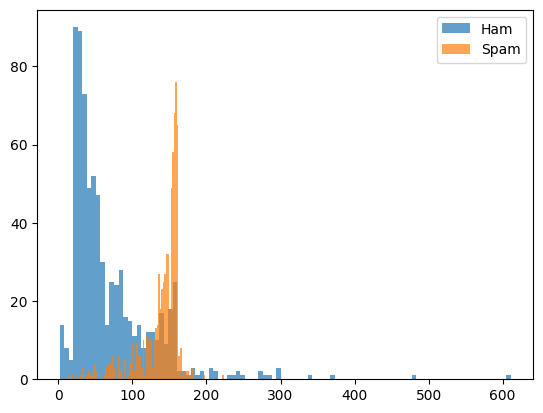

In [46]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

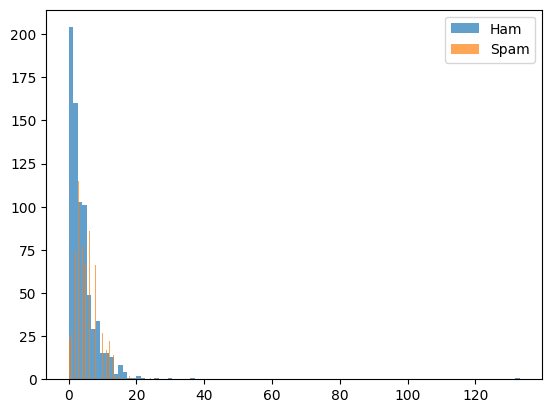

In [47]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

# Creating the Bag of Word model-Naive baes classifier-evaluation

In [66]:
import nltk
import re  # Import the re module for regular expressions
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for Bag of Words model
import pandas as pd  # Import pandas for handling DataFrames

# Initialize the PorterStemmer and WordNetLemmatizer
ps = PorterStemmer()
corpus = []
messages=data

# Cleaning the text
for i in range(0,len(messages)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()  
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Join the cleaned words back into a sentence
    review = " ".join(review)
    
    # Append the cleaned sentence to the corpus
    corpus.append(review)

# Creating the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray() 

# Assuming 'messages' has a 'label' column for classification
y = pd.get_dummies(messages['label'], drop_first=True).values  # Convert labels to dummy variables

# Training and Testing
from sklearn.model_selection import train_test_split  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model using Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB  # Corrected import statement and class name

# Initialize and train the Naive Bayes model
spam_detect_model = MultinomialNB().fit(X_train, y_train)

# Predict the labels for the test set
y_pred = spam_detect_model.predict(X_test)

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

# Generate the confusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

# Display the confusion matrix
print(confusion_m)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))

[[145   6]
 [  8 140]]
Accuracy: 95.32%
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       151
           1       0.96      0.95      0.95       148

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Creating TF-IDF-RandomForest-Evaluaton

In [65]:
import nltk
import re  # Import the re module for regular expressions
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for TF-IDF model


# Initialize the PorterStemmer and WordNetLemmatizer
ps = PorterStemmer()
corpus = []
messages = data

# Cleaning the text
for i in range(len(messages)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()  
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Join the cleaned words back into a sentence
    review = " ".join(review)
    
    # Append the cleaned sentence to the corpus
    corpus.append(review)

# Creating the TF-IDF model
tfidf = TfidfVectorizer(max_features=5000)  # Limit the features to 5000 for efficiency
X = tfidf.fit_transform(corpus).toarray()

# Assuming 'messages' has a 'label' column for classification
y = pd.get_dummies(messages['label'], drop_first=True).values  # Convert labels to dummy variables

# Training and Testing
from sklearn.model_selection import train_test_split  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model using Random Forest classifier
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier

# Initialize and train the Random Forest model
spam_detect_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

# Predict the labels for the test set
y_pred = spam_detect_model.predict(X_test)

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

# Generate the confusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix and accuracy
print(confusion_m)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


/tmp/ipykernel_127/3138776016.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  spam_detect_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)


[[148   3]
 [ 12 136]]
Accuracy: 94.98%
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       151
           1       0.98      0.92      0.95       148

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



# Word2vec and SVM

In [78]:
import nltk
import re  # Import the re module for regular expressions
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  # Import SVM classifier
from gensim.models import Word2Vec  # Import Word2Vec from gensim
import pandas as pd  # Import pandas for handling DataFrames
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

# Initialize the PorterStemmer
ps = PorterStemmer()
corpus = []
messages = data  # Assuming 'data' is your DataFrame

# Cleaning the text
for i in range(0, len(messages)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()  
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Append the cleaned sentence to the corpus
    corpus.append(review)

# Training the Word2Vec model
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Generating the word vectors for each sentence in the corpus
def get_average_word2vec(sentence, model, vector_size):
    # Function to average word vectors for a sentence
    #Creates an array of zeros with the same size as the word vectors. 
    vec = np.zeros(vector_size)
    count = 0
    for word in sentence:
        if word in model.wv.key_to_index:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

X = np.array([get_average_word2vec(sentence, word2vec_model, 100) for sentence in corpus])

# Assuming 'messages' has a 'label' column for classification
y = pd.get_dummies(messages['label'], drop_first=True).values.ravel()  # Convert labels to dummy variables and flatten

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model using SVM classifier
svm_model = SVC(kernel='linear', random_state=0)  # Initialize and train the SVM model
svm_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Evaluation
confusion_m = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix and accuracy
print(confusion_m)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


[[118  33]
 [ 31 117]]
Accuracy: 78.60%
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       151
           1       0.78      0.79      0.79       148

    accuracy                           0.79       299
   macro avg       0.79      0.79      0.79       299
weighted avg       0.79      0.79      0.79       299



# LSTM 

In [86]:
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the PorterStemmer
ps = PorterStemmer()
corpus = []
messages = data  # Assuming 'data' is your DataFrame

# Cleaning the text
for i in range(0, len(messages)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Append the cleaned sentence to the corpus
    corpus.append(' '.join(review))

# Tokenization and word embedding preparation
# Step 1: Initialize the Tokenizer
tokenizer = Tokenizer()  # Tokenizer will convert words to integer indices

# Step 2: Fit the tokenizer on the corpus
tokenizer.fit_on_texts(corpus)  # Create the vocabulary based on the corpus

# Step 3: Convert texts to sequences of integers
X = tokenizer.texts_to_sequences(corpus)  # Each sentence is converted to a list of integers

# Step 4: Padding sequences to ensure uniform input length
max_len = max(len(seq) for seq in X)  # Determine the maximum sequence length
X = pad_sequences(X, maxlen=max_len, padding='post')  # Pad sequences with zeros at the end

# Assuming 'messages' has a 'label' column for classification
y = pd.get_dummies(messages['label'], drop_first=True).values  # Convert labels to dummy variables

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the LSTM model
model = Sequential()

# Step 5: Add Embedding layer
# The Embedding layer turns positive integers (indexes) into dense vectors of fixed size
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,  # Size of the vocabulary
                    output_dim=100,  # Size of the word vectors
                    input_length=max_len))  # Length of input sequences

# Step 6: Add LSTM layers with Dropout for regularization
model.add(LSTM(units=128, return_sequences=True))  # First LSTM layer with output sequences
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=128))  # Second LSTM layer
model.add(Dropout(0.2))  # Another Dropout layer

# Step 7: Add output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 10: Train the model with early stopping
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Step 11: Predicting the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Evaluation
confusion_m = confusion_matrix(y_test, y_pred)  # Confusion matrix
accuracy = accuracy_score(y_test, y_pred)  # Accuracy score

# Display the confusion matrix and accuracy
print(confusion_m)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))  # Detailed classification report


Epoch 1/10
15/15 [==============================] - 4s 154ms/step - loss: 0.6944 - accuracy: 0.4895 - val_loss: 0.6935 - val_accuracy: 0.4854
Epoch 2/10
15/15 [==============================] - 2s 128ms/step - loss: 0.6940 - accuracy: 0.4895 - val_loss: 0.6930 - val_accuracy: 0.5146
Epoch 3/10
15/15 [==============================] - 2s 128ms/step - loss: 0.6950 - accuracy: 0.5021 - val_loss: 0.6934 - val_accuracy: 0.4854
Epoch 4/10
15/15 [==============================] - 2s 129ms/step - loss: 0.6936 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5146
Epoch 5/10
15/15 [==============================] - 2s 131ms/step - loss: 0.6942 - accuracy: 0.5010 - val_loss: 0.6935 - val_accuracy: 0.4854
Epoch 6/10
15/15 [==============================] - 2s 129ms/step - loss: 0.6936 - accuracy: 0.4990 - val_loss: 0.6929 - val_accuracy: 0.5146
Epoch 7/10
15/15 [==============================] - 2s 129ms/step - loss: 0.6940 - accuracy: 0.4854 - val_loss: 0.6934 - val_accuracy: 0.4854
Epoch 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# biLSTM

In [87]:
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the PorterStemmer
ps = PorterStemmer()
corpus = []
messages = data  # Assuming 'data' is your DataFrame

# Cleaning the text
for i in range(0, len(messages)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    
    # Split the sentence into words
    review = review.split()
    
    # Stem each word and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    
    # Append the cleaned sentence to the corpus
    corpus.append(' '.join(review))

# Tokenization and word embedding preparation
# Step 1: Initialize the Tokenizer
tokenizer = Tokenizer()  # Tokenizer will convert words to integer indices

# Step 2: Fit the tokenizer on the corpus
tokenizer.fit_on_texts(corpus)  # Create the vocabulary based on the corpus

# Step 3: Convert texts to sequences of integers
X = tokenizer.texts_to_sequences(corpus)  # Each sentence is converted to a list of integers

# Step 4: Padding sequences to ensure uniform input length
max_len = max(len(seq) for seq in X)  # Determine the maximum sequence length
X = pad_sequences(X, maxlen=max_len, padding='post')  # Pad sequences with zeros at the end

# Assuming 'messages' has a 'label' column for classification
y = pd.get_dummies(messages['label'], drop_first=True).values  # Convert labels to dummy variables

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the biLSTM model
model = Sequential()

# Step 5: Add Embedding layer
# The Embedding layer turns positive integers (indexes) into dense vectors of fixed size
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,  # Size of the vocabulary
                    output_dim=100,  # Size of the word vectors
                    input_length=max_len))  # Length of input sequences

# Step 6: Add Bidirectional LSTM layers with Dropout for regularization
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))  # First Bidirectional LSTM layer with output sequences
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Bidirectional(LSTM(units=128)))  # Second Bidirectional LSTM layer
model.add(Dropout(0.2))  # Another Dropout layer

# Step 7: Add output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Step 8: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 9: Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 10: Train the model with early stopping
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Step 11: Predicting the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Evaluation
confusion_m = confusion_matrix(y_test, y_pred)  # Confusion matrix
accuracy = accuracy_score(y_test, y_pred)  # Accuracy score

# Display the confusion matrix and accuracy
print(confusion_m)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))  # Detailed classification report


Epoch 1/10
15/15 [==============================] - 5s 184ms/step - loss: 0.5639 - accuracy: 0.6757 - val_loss: 0.3700 - val_accuracy: 0.8536
Epoch 2/10
15/15 [==============================] - 2s 137ms/step - loss: 0.2291 - accuracy: 0.9215 - val_loss: 0.1656 - val_accuracy: 0.9456
Epoch 3/10
15/15 [==============================] - 2s 136ms/step - loss: 0.0795 - accuracy: 0.9791 - val_loss: 0.1304 - val_accuracy: 0.9582
Epoch 4/10
15/15 [==============================] - 2s 135ms/step - loss: 0.0451 - accuracy: 0.9895 - val_loss: 0.1896 - val_accuracy: 0.9498
Epoch 5/10
15/15 [==============================] - 2s 140ms/step - loss: 0.0244 - accuracy: 0.9937 - val_loss: 0.1637 - val_accuracy: 0.9582
Epoch 6/10
10/10 [==============================] - 1s 31ms/step
[[146   5]
 [ 12 136]]
Accuracy: 94.31%
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       151
           1       0.96      0.92      0.94       148

    accuracy         

# BERT+Tensortflow

In [91]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Step 1: Preprocess the text
def preprocess_text(text):
    # Clean the text: keep only letters, convert to lowercase, and strip extra spaces
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower().strip()
    return cleaned_text

# Apply preprocessing to the text column
data['message'] = data['message'].apply(preprocess_text)

# Step 2: Initialize the BERT tokenizer
#The BertTokenizer is used to convert text data into a format that the BERT model can understand
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 3: Tokenize the text
def tokenize_texts(texts, tokenizer, max_len=128):
    # Tokenize and encode the texts, making them ready for BERT
    encoded_data = tokenizer(
        texts.tolist(),  #Converts the text data into a list.
        max_length=max_len, #Ensures that all tokenized sequences have the same length by padding 
        padding='max_length', #Adds padding to make all sequences the same length.
        return_tensors='tf',  #Returns the data in TensorFlow tensor format.
        truncation=True  #remove white space
    )
    return encoded_data['input_ids'].numpy(), encoded_data['attention_mask'].numpy()

# Tokenize the messages
#This converts the text data into input_ids (the actual token IDs) 
#attention_masks (which indicate which tokens should be attended to by the model).
input_ids, attention_masks = tokenize_texts(data['message'], tokenizer)

# Step 4: Prepare the labels
labels = pd.get_dummies(data['label'], drop_first=True).values

# Step 5: Split the data into training and test sets
X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=0
)


# Convert the split data back into tensors
X_train = {
    'input_ids': tf.convert_to_tensor(X_train_ids), 
    'attention_mask': tf.convert_to_tensor(X_train_masks)
}

X_test = {
    'input_ids': tf.convert_to_tensor(X_test_ids), 
    'attention_mask': tf.convert_to_tensor(X_test_masks)
}

# Step 6: Load the pre-trained BERT model for classification
#Loads a pre-trained BERT model specifically designed for sequence classification tasks.
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

# Step 7: Compile the model with an optimizer and loss function
model.compile(
    optimizer=Adam(learning_rate=2e-5), #Uses the Adam optimizer with a small learning rate for fine-tuning the model.
    loss='binary_crossentropy',  #Uses binary cross-entropy as the loss function because this is a binary classification problem.
    metrics=['accuracy'] #Tracks accuracy during training and evaluation.
)

# Step 8: Train the model with early stopping
history = model.fit(
    ##The input data and labels for training.
    X_train, y_train, 
    #The number of times the model will go through the entire training dataset.
    epochs=3, 
    ##The number of samples the model processes before updating its parameters.
    batch_size=16, 
    ##Splits off 20% of the training data for validation (to monitor the model’s performance on unseen data during training).
    validation_split=0.2,  
    #Stops training if the validation loss doesn't improve for 3 epochs, and restores the best weights.
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

# Step 9: Make predictions on the test set
#Gets the raw predictions (logits) from the model for the test set.
y_pred_logits = model.predict(X_test)['logits']

# Convert the logits to binary predictions (0 or 1) using a threshold of 0.5
y_pred = (y_pred_logits > 0).astype("int32")

# Step 10: Evaluate the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
60/60 [==============================] - 128s 2s/step - loss: 0.5673 - accuracy: 0.7626 - val_loss: 0.3260 - val_accuracy: 0.9414
Epoch 2/3
60/60 [==============================] - 111s 2s/step - loss: 0.1576 - accuracy: 0.9571 - val_loss: 0.2017 - val_accuracy: 0.9582
Epoch 3/3
10/10 [==============================] - 9s 824ms/step
Confusion Matrix:
[[141  10]
 [  4 144]]
Accuracy: 95.32%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       151
           1       0.94      0.97      0.95       148

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



# BERT model using PyTorch 

In [105]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss
from tqdm import tqdm

# Step 1: Preprocess the text
def preprocess_text(text):
    # Clean the text: keep only letters, convert to lowercase, and strip extra spaces
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text).lower().strip()
    return cleaned_text

# Apply preprocessing to the text column
data['message'] = data['message'].apply(preprocess_text)

# Step 2: Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 3: Tokenize the text
def tokenize_texts(texts, tokenizer, max_len=128):
    # Tokenize and encode the texts
    encoded_data = tokenizer(
        texts.tolist(),
        max_length=max_len,
        padding='max_length',
        return_tensors='pt',  # Returns the data in PyTorch tensor format
        truncation=True
    )
    return encoded_data['input_ids'], encoded_data['attention_mask']

# Tokenize the messages
input_ids, attention_masks = tokenize_texts(data['message'], tokenizer)

# Step 4: Prepare the labels
#The labels are converted into one-hot encoded format using pd.get_dummies
#and then converted into PyTorch tensors of type float32.
labels = torch.tensor(pd.get_dummies(data['label'], drop_first=True).values, dtype=torch.float32)

# Step 5: Split the data into training and test sets
X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=0
)


# Combine the input_ids and attention_mask for training and test sets
train_dataset = TensorDataset(X_train_ids, X_train_masks, y_train)
test_dataset = TensorDataset(X_test_ids, X_test_masks, y_test)

# Step 6: Load the pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

# Step 7: Set up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=2e-5)
#The BCEWithLogitsLoss is used, which combines a sigmoid layer and binary cross-entropy loss.
loss_fn = BCEWithLogitsLoss() 

#step 8
# Create a DataLoader to handle the training dataset in batches
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# Set the model to training mode
model.train()

# Training loop for a specified number of epochs
for epoch in range(3):  # Number of epochs
    epoch_loss = 0.0  # Initialize the loss for the current epoch
    
    # Iterate over each batch in the training DataLoader
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()  # Clear the gradients of all optimized variables
        
        # Unpack the batch into input_ids, attention_masks, and labels
        input_ids, attention_masks, labels = batch
        
        # Forward pass: compute the model's output for the inputs
        outputs = model(input_ids, attention_mask=attention_masks)
        
        # Compute the loss between the model's predictions and the true labels
        loss = loss_fn(outputs.logits.squeeze(), labels.squeeze())
        
        # Backward pass: compute the gradients of the loss with respect to model parameters
        loss.backward()
        
        # Update the model's parameters using the computed gradients
        optimizer.step()
        
        # Accumulate the loss for the current epoch
        epoch_loss += loss.item()
    
    # Compute the average loss for the current epoch
    avg_loss = epoch_loss / len(train_dataloader)
    
    # Print the average loss for the current epoch
    print(f"Epoch {epoch+1} - Loss: {avg_loss}")

# Step 9: Make predictions on the test set

# Set the model to evaluation mode
model.eval()

# Create a DataLoader for the test dataset with a batch size of 16
# The shuffle=False argument ensures that the data is not shuffled, preserving the order
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize an empty list to store all predictions
all_preds = []

# Disable gradient calculations since we're only making predictions
with torch.no_grad():
    # Iterate over each batch in the test DataLoader
    for batch in test_dataloader:
        # Unpack the batch into input_ids and attention_masks
        # The third element (labels) is ignored since it's not needed for predictions
        input_ids, attention_masks, _ = batch
        
        # Perform a forward pass through the model to get the outputs
        outputs = model(input_ids, attention_mask=attention_masks)
        
        # Apply the sigmoid function to the logits to convert them to probabilities
        preds = torch.sigmoid(outputs.logits).squeeze().cpu().numpy()
        
        # Extend the list of all predictions with the current batch's predictions
        all_preds.extend(preds)

# Convert predictions to binary (0 or 1)
y_pred = (np.array(all_preds) > 0.5).astype("int32")

# Step 10: Evaluate the results
print("Confusion Matrix:")
print(confusion_matrix(y_test.numpy(), y_pred))
print(f"Accuracy: {accuracy_score(y_test.numpy(), y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test.numpy(), y_pred))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 75/75 [01:51<00:00,  1.48s/it]


Epoch 1 - Loss: 0.31490510448813436


100%|██████████| 75/75 [01:47<00:00,  1.44s/it]


Epoch 2 - Loss: 0.0910369474440813


100%|██████████| 75/75 [01:51<00:00,  1.49s/it]


Epoch 3 - Loss: 0.046598543239136536
Confusion Matrix:
[[146   5]
 [  4 144]]
Accuracy: 96.99%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       151
         1.0       0.97      0.97      0.97       148

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



## Explanation

### DataLoader

`train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)`: This line creates a `DataLoader` to efficiently handle the training dataset in batches of size 16. The `shuffle=True` argument ensures that the data is shuffled before each epoch, helping the model generalize better.

### Model in Training Mode

`model.train()`: This sets the model to training mode, which is necessary for certain layers like dropout and batch normalization to behave differently during training.

### Training Loop

`for epoch in range(3)`: This loop runs for a specified number of epochs (in this case, 3). An epoch represents one full pass through the entire training dataset.

`epoch_loss = 0.0`: Initializes a variable to accumulate the loss for the current epoch.

### Batch Processing

`for batch in tqdm(train_dataloader)`: This loop iterates over each batch of data in the `train_dataloader`. The `tqdm` function provides a progress bar to monitor the loop's progress.

`optimizer.zero_grad()`: Clears the gradients from the previous step to prevent accumulation.

`input_ids, attention_masks, labels = batch`: Unpacks the batch into `input_ids`, `attention_masks`, and `labels`.

`outputs = model(input_ids, attention_mask=attention_masks)`: Performs a forward pass through the model to obtain the outputs.

### Loss Calculation

`loss = loss_fn(outputs.logits.squeeze(), labels.squeeze())`: Computes the loss between the model's predictions and the true labels using a predefined loss function.

### Backward Pass and Optimization

`loss.backward()`: Computes the gradients of the loss with respect to the model's parameters.

`optimizer.step()`: Updates the model's parameters based on the computed gradients.

### Loss Accumulation

`epoch_loss += loss.item()`: Accumulates the loss for the current epoch to calculate the average loss later.

### Average Loss Calculation and Display

`avg_loss = epoch_loss / len(train_dataloader)`: Calculates the average loss for the current epoch by dividing the accumulated loss by the number of batches.

`print(f"Epoch {epoch+1} - Loss: {avg_loss}")`: Prints the average loss for the current epoch.

This code trains a model for 3 epochs on a given dataset, calculating and printing the average loss at the end of each epoch. Notably, this training process does not include early stopping, meaning the model will complete all epochs regardless of the loss trends.


## Explanation

### Set Model to Evaluation Mode

`model.eval()`: This switches the model to evaluation mode. In this mode, layers like dropout and batch normalization behave differently, as they are adjusted to work appropriately for inference rather than training.

### Create DataLoader for Test Set

`test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)`: This creates a `DataLoader` to handle the test dataset in batches of size 16. The `shuffle=False` argument ensures that the test data is processed in its original order, which is important if you need to maintain the sequence of predictions.

### Disable Gradient Calculations

`with torch.no_grad()`: This context manager disables gradient calculations, reducing memory usage and speeding up computations since gradients are not needed when making predictions.

### Batch Processing

`for batch in test_dataloader`: This loop iterates over each batch in the `test_dataloader`.

`input_ids, attention_masks, _ = batch`: Unpacks the batch into `input_ids` and `attention_masks`. The third element (usually labels) is ignored with `_` because it's not needed for prediction.

### Model Inference

`outputs = model(input_ids, attention_mask=attention_masks)`: The model processes the `input_ids` and `attention_masks` through a forward pass, producing raw output scores (logits).

### Convert Logits to Probabilities

`preds = torch.sigmoid(outputs.logits).squeeze().cpu().numpy()`: The logits (raw scores) are passed through the sigmoid function, which converts them to probabilities. The `.squeeze()` function removes any extra dimensions, and `.cpu().numpy()` moves the tensor from the GPU to the CPU and converts it to a NumPy array.

### Store Predictions

`all_preds.extend(preds)`: The predictions from the current batch are added to the `all_preds` list, which stores all predictions across all batches.

This code is designed to make predictions on the test set, converting the model's raw output logits into probabilities and storing those predictions for further analysis or evaluation.
